# Regresión Logística

## 1. Carga de los datos

In [30]:
import pandas as pd                #Carga de archivos
import numpy as np                 #Arrays
import matplotlib.pyplot  as plt   #Requiere sns
import seaborn as sns; sns.set()   #Plots
import pandas_profiling as pp      #Descriptivo
from sklearn.cross_validation import train_test_split #Split train test
import statsmodels.api as sm       #Regresion
import statsmodels.formula.api as smf #Regresion
from sklearn.metrics import confusion_matrix, classification_report #Crear la matriz de confusión

C:\Users\Andrea\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Andrea\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Andrea\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Andrea\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Andrea\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Andrea\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "C:\Use

#### Se comparan patrones de lactancia, muestra es de 1401 niños de los cuales 823 eran atendidos por el sistema de médicos de la familia (MF) y 578 estaban inscritos en el sistema de sectores de salud (SF). Lactancia: 0 si el niño no lacta y 1 si lo hace.  AP 0 si MF y 1 si SF. Edad en días al momento de la encuesta.

In [2]:
datos=pd.read_csv('C:\\Users\\Andrea\\Downloads\\Lactancia.txt', sep="\t")

In [3]:
datos.head()

,Edad,AP,Lactancia
0,20,1,1
1,185,1,0
2,359,1,0
3,351,1,0
4,347,1,0


## 2. Exploración de los datos

In [31]:
pp.ProfileReport(datos)

Number of variables,3
Number of observations,1401
Total Missing (%),0.0%
Total size in memory,32.9 KiB
Average record size in memory,24.1 B
Numeric,1
Categorical,0
Boolean,2
Date,0
Text (Unique),0
Rejected,0


#### Otros gráficos y detalles

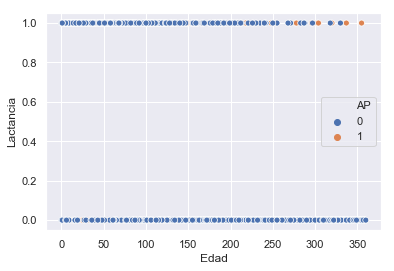

In [4]:
sns.scatterplot(data=datos, x='Edad', y='Lactancia', hue='AP')
plt.show()

In [5]:
datos['Lactancia'].value_counts()

0    934
1    467
Name: Lactancia, dtype: int64

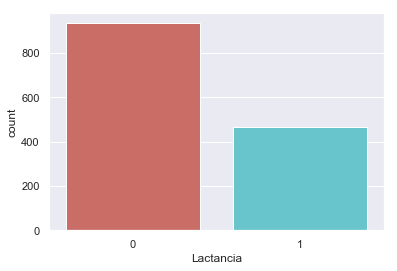

In [6]:
sns.countplot(x=datos['Lactancia'], palette='hls' )
plt.show()

In [7]:
datos.groupby('Lactancia').mean()

,Edad,AP
Lactancia,,
0,222.682013,0.395075
1,97.340471,0.447537


In [8]:
table=pd.crosstab(datos.AP,datos.Lactancia)
table

Lactancia,0,1
AP,,
0,565,258
1,369,209


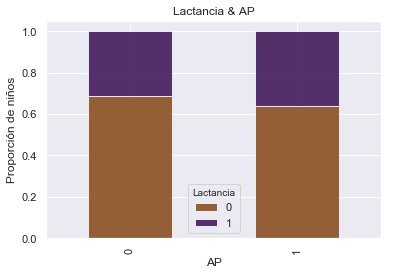

In [9]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, cmap="PuOr", alpha=0.8)
plt.title('Lactancia & AP')
plt.xlabel('AP')
plt.ylabel('Proporción de niños')
plt.show()

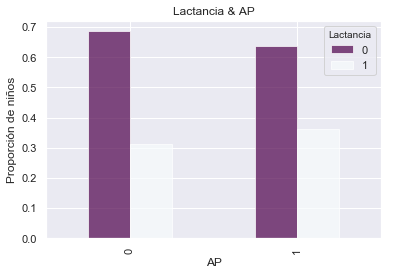

In [10]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', cmap="BuPu_r", alpha=0.7)
plt.title('Lactancia & AP')
plt.xlabel('AP')
plt.ylabel('Proporción de niños')
plt.show()

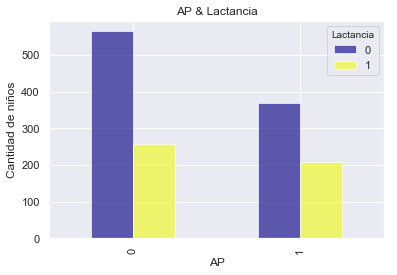

In [11]:
pd.crosstab(datos.AP,datos.Lactancia).plot(kind='bar', cmap="plasma", alpha=0.65)
plt.title('AP & Lactancia')
plt.xlabel('AP')
plt.ylabel('Cantidad de niños')
plt.show()

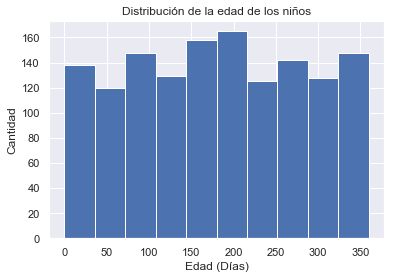

In [12]:
datos.Edad.hist()
plt.xlabel('Edad (Días)')
plt.ylabel('Cantidad')
plt.title('Distribución de la edad de los niños')
plt.show()

In [13]:
lfuncs = ['min','median','max']
datos.groupby('Lactancia').agg({'Lactancia': lfuncs,'Edad': lfuncs}).round(1)

Lactancia            Edad            
                min median max  min median  max
Lactancia                                      
0                 0      0   0    0    230  360
1                 1      1   1    0     82  355

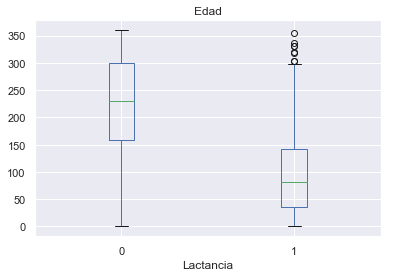

In [14]:
datos.boxplot('Edad',by='Lactancia')
plt.suptitle("")
plt.show()

## 3. Creando variables dummies

In [15]:
cat_list = pd.get_dummies(datos['AP'], prefix='AP')

In [16]:
cat_list.head()

,AP_0,AP_1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [17]:
data=datos.join(cat_list)
data.head()

,Edad,AP,Lactancia,AP_0,AP_1
0,20,1,1,0,1
1,185,1,0,0,1
2,359,1,0,0,1
3,351,1,0,0,1
4,347,1,0,0,1


In [19]:
data = data.drop("AP", axis=1)

In [20]:
data.head()

,Edad,Lactancia,AP_0,AP_1
0,20,1,0,1
1,185,0,0,1
2,359,0,0,1
3,351,0,0,1
4,347,0,0,1


## 4. Separando las variables para introducir en el modelo

In [32]:
X=pd.DataFrame(data=data, columns=['Edad', 'AP_0', 'AP_1'])

In [33]:
y=data['Lactancia']

In [23]:

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.442679
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.305      
Dependent Variable: Lactancia        AIC:              1246.3874  
Date:               2019-03-07 21:53 BIC:              1262.1223  
No. Observations:   1401             Log-Likelihood:   -620.19    
Df Model:           2                LL-Null:          -891.76    
Df Residuals:       1398             LLR p-value:      1.1531e-118
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
Edad      -0.0166     0.0009   -18.1255   0.0000   -0.0184   -0.0148
AP_0       1.7316     0.1515    11.4287   0.0

## 5. Creación del modelo

In [24]:
# Split the data into training and testing sets
X = data
y = data['Lactancia']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [25]:
# Create a string for the formula
cols = data.columns.drop('Lactancia')
formula = 'Lactancia ~ ' + ' + '.join(cols)
print(formula, '\n')

Lactancia ~ Edad + AP_0 + AP_1 



In [26]:
# Run the model and report the results
model = smf.glm(formula=formula, data=X_train, family=sm.families.Binomial())
logistic_fit = model.fit()

print(logistic_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Lactancia   No. Observations:                  980
Model:                            GLM   Df Residuals:                      977
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -413.96
Date:                Thu, 07 Mar 2019   Deviance:                       827.92
Time:                        21:53:02   Pearson chi2:                 1.00e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3824      0.122     11.372      0.000       1.144       1.621
Edad          -0.0178      0.001    -15.264      0.0

## 6. Validación del modelo con matriz de confusión

In [27]:
predictions = logistic_fit.predict(X_test)
predictions[1:6]

738    0.044472
154    0.582254
380    0.024183
921    0.486478
723    0.385991
dtype: float64

In [28]:
# Note how the values are numerical. 
# Convert these probabilities into nominal values and check the first 5 predictions again.
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
predictions_nominal[1:6]

[0, 1, 0, 0, 0]

In [29]:
print(classification_report(y_test, predictions_nominal, digits=3))

cfm = confusion_matrix(y_test, predictions_nominal)

true_negative = cfm[0][0]
false_positive = cfm[0][1]
false_negative = cfm[1][0]
true_positive = cfm[1][1]

print('Confusion Matrix: \n', cfm, '\n')

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print('Correct Predictions', 
      round((true_negative + true_positive) / len(predictions_nominal) * 100, 1), '%')

             precision    recall  f1-score   support

          0      0.805     0.858     0.831       275
          1      0.695     0.610     0.650       146

avg / total      0.767     0.772     0.768       421

Confusion Matrix: 
 [[236  39]
 [ 57  89]] 

True Negative: 236
False Positive: 39
False Negative: 57
True Positive: 89
Correct Predictions 77.2 %
